# Project: Investigate a Dataset - [TMDB Movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction

### Dataset Description 
The author always had a big interest in watching movies. As most people did, the author also experienced good and bad movies. But what determines if a movie is considered as good or bad? There could be several factors influencig the quality of a movie, as for example the budget, genre, etc. This little project should help the author to improve his data analytics skills and explore some of the success criteria for movies. 


### Question(s) for Analysis
1. Actors with the most appearances in films
2. Exploring the Movie genres through the years of the dataset
3. Top Movies based on features
4. Average Votes Distribution
5. Correlations

In [47]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the data and having a look at the first few lines
data = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
data.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Types and look for instances of missing or possibly errant data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#Types and look for instances of missing or possibly errant data.
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Result
* There are some rows have values separated by ( | ). They must be cleaned.

1. cast
2. genres
3. production_companies
4. keywords
5. director
- I will clean it later in EDA section.


* There are some columns not important . They must be cleaned.
1. imdb_id
2. homepage
3. overview
4. release_date
5. tagline


* There are some columns have some NAN values. They must be cleaned.
1. cast
2. director
3. genres
4. production_companies

# Data Cleaning 

In [5]:
#To remove not important columns
data = data.drop(['imdb_id','homepage','overview','release_date','tagline'], axis = 1)

In [6]:
#To remove rows of NANs acording to cast, genres and director.
data = data[data["cast"].isnull() == False]
data = data[data["genres"].isnull() == False]
data = data[data["director"].isnull() == False]

In [7]:
#To check if there are some rows duplicated
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [8]:
#To remove rows where (revenue_adj) and (budget_adj) is equal to zero
data = data[data.budget_adj != 0]
data = data[data.revenue_adj != 0]

Now, Data has been prepared.
- No duplicated rows.
- No rows having NANs in (cast) and (genres) columns.
- No not important columns
- No rows having zeros in (revenue_adj) and (budget_adj) columns.

In [9]:
print('Dataframe contains {} rows and {} columns'.format(data.shape[0],data.shape[1]))

Dataframe contains 3849 rows and 16 columns


In [10]:
data.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


Now, We finished from the cleaning process so, we are ready to the next step ( EDA ).

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 


### Research Question 1 (How many movies in each year?)

In [11]:
#To determine number of movies/year
movies_num_year = data.groupby('release_year').original_title.count()
movies_num_year

release_year
1960      5
1961     10
1962      7
1963      6
1964      7
1965      5
1966      5
1967     13
1968      9
1969      4
1970     11
1971     13
1972      8
1973     12
1974     13
1975      9
1976     15
1977     19
1978     17
1979     16
1980     23
1981     30
1982     26
1983     31
1984     42
1985     41
1986     48
1987     46
1988     56
1989     51
1990     53
1991     50
1992     53
1993     72
1994     62
1995     81
1996     86
1997     90
1998     92
1999    116
2000    106
2001    121
2002    126
2003    121
2004    147
2005    163
2006    169
2007    164
2008    166
2009    174
2010    178
2011    199
2012    157
2013    180
2014    165
2015    160
Name: original_title, dtype: int64

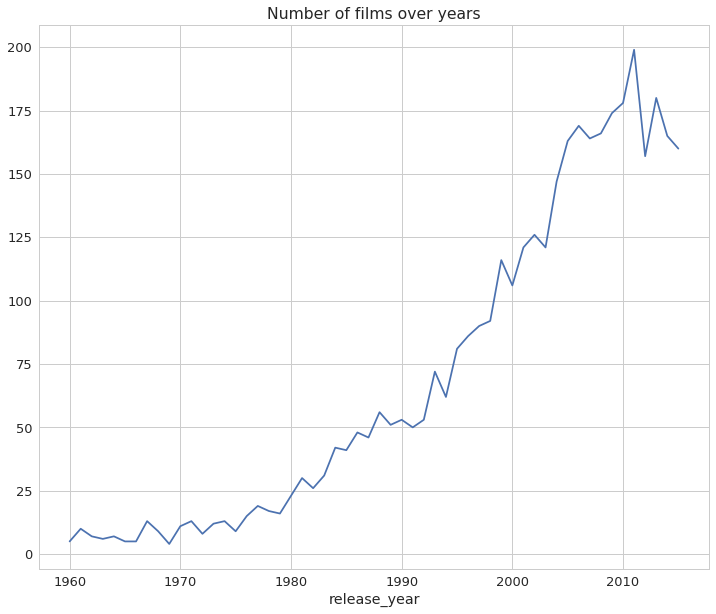

In [50]:
#To visualize that
ax = movies_num_year.plot(grid=True,figsize=(12, 10), title='Number of films over years')
ax.set_xlabel = 'Year'
ax.set_ylabel = 'Number of films'

### Research Question 2  (Actors with the most appearances in films?)

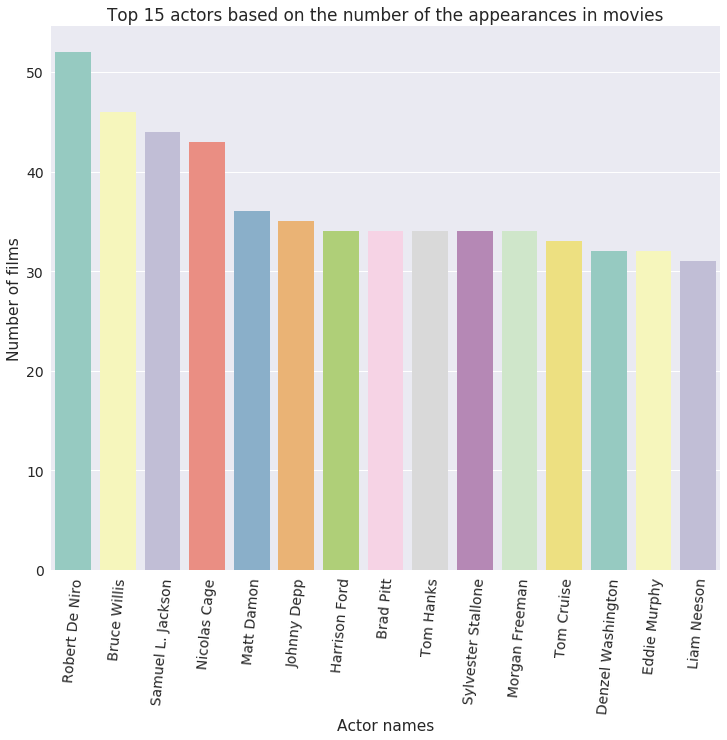

In [16]:
# After discussing the structure of the data and any problems that need to be cleaned, perform those cleaning steps in the second part of this section.

#To create a dict for the cast, and how many times each actor casted for movies.

actor_dict = {}

actors = data["cast"]
actors = actors.str.split("|")
actors = np.array(actors)
for actorList in actors:
    #check if there is a problematic list which is just a float
    for actor in actorList:
        actor = actor.lstrip() #trim the whitespaces
        if actor not in actor_dict:
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
                
#To sort this dict in descending sort
sorted_actor_dict = sorted(actor_dict.items(), key=lambda item: item[1],reverse=True)

#To visualize that
x_axis = list()
y_axis = list()

for item in sorted_actor_dict[0:15]:
    x_axis.append(item[0])
    y_axis.append(item[1])

sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(x_axis, y_axis, palette="Set3", linewidth=0)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)  
    
ax.set(xlabel='Actor names', ylabel='Number of films', title = 'Top 15 actors based on the number of the appearances in movies')
plt.show()

### Research Question 3  (Exploring the Movie genres through the years of the dataset?)

#### Question #3.1: Most popular movie genre by year
Let's see which genre was the most popular over years and the number of movies that belong to this genre.

In [17]:
year_set = set()
genre_set = set()
genres_and_year = data[["genres", "release_year"]]

#create a set of unique years of movies
production_year = genres_and_year["release_year"]
production_year = production_year.drop_duplicates()

for year in production_year:
    if year not in year_set:
        year_set.add(year)
        

#create a set of unique genres by parsing all the years
for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_set:
                genre_set.add(genre)


#create a dataframe which contains the sum of movies' genre per year
gerne_count_per_year_df = pd.DataFrame(index = year_set, columns=genre_set)
gerne_count_per_year_df[:] = 0  

for year in year_set:
    genre_dict = {}
    genres_in_year = genres_and_year[genres_and_year.release_year == year]
    genres_in_year = genres_in_year["genres"].values
    for elem in genres_in_year:
        genres_row = elem.split("|")
        for genre in genres_row:
            if genre not in genre_dict:
                genre_dict[genre] = 1
            else:
                genre_dict[genre] = genre_dict[genre] + 1
                    
    aux_df = pd.DataFrame(genre_dict, index = [year])
    gerne_count_per_year_df.loc[year, aux_df.columns] = gerne_count_per_year_df.loc[year, aux_df.columns] + aux_df.loc[year]



most_popular_genre_by_year = pd.DataFrame([gerne_count_per_year_df.astype('float64').idxmax(axis = 1).values,
                                          gerne_count_per_year_df.apply( max, axis=1 ).values],
                                          columns = gerne_count_per_year_df.index,
                                         index = ["genre", 'counts'])
most_popular_genre_by_year

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
genre,Drama,Drama,Drama,History,Drama,Drama,Drama,Drama,Drama,Drama,...,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama,Drama
counts,3,6,5,3,4,3,2,7,6,2,...,89,75,80,83,84,89,66,80,79,81


#### Question #3.2: How much the movie genres changes from year to year
Show the flactuations of movie genres from year to year. Bar plot is used to visualize the movie genres' changes/flactuations/trends from year to year.

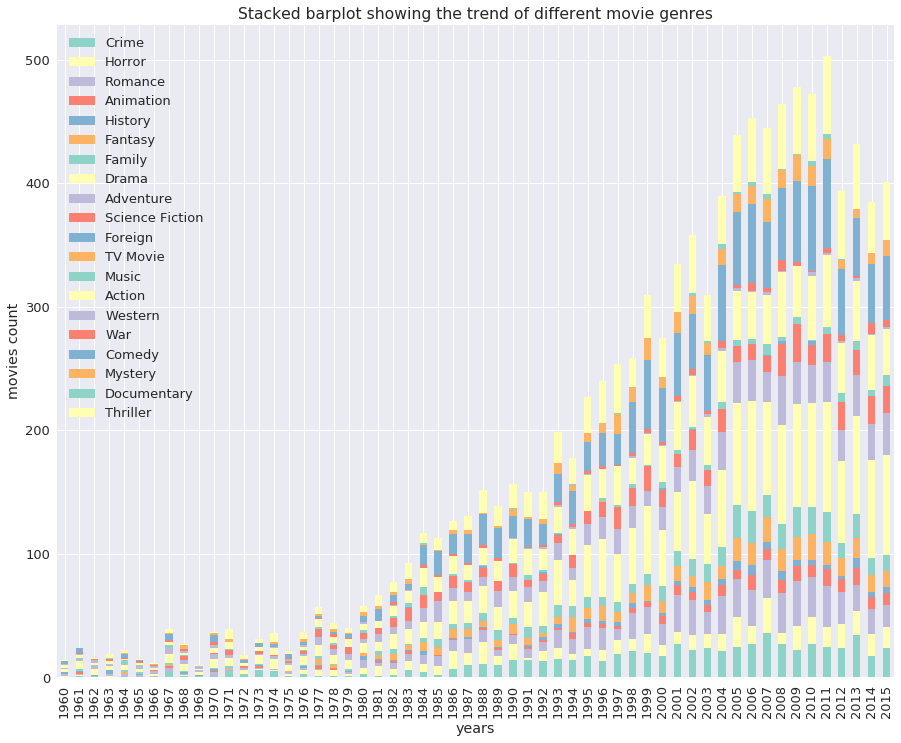

In [18]:
#Two visualize that
sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.3)
sns.set_palette(palette="Set3")

ax = gerne_count_per_year_df.plot.bar(stacked=True,linewidth=0);
ax.set(xlabel='years', ylabel='movies count', title = 'Stacked barplot showing the trend of different movie genres')
plt.show()

In general, the number of movies and the movie genres show an increase in numbers from 1960 to 2015. As we can see the majority of the movie genres show an increasing trend. 
Drama seems to be the most frequent genre in movies through all these years. 
Other categories such as Thriller, Comedy and Action movies show a similar pattern.

#### Question #3.3: How many movies based on their genres were produced
Showing the number of movies that produced in 1960 to 2015 according to their respective movie genres.

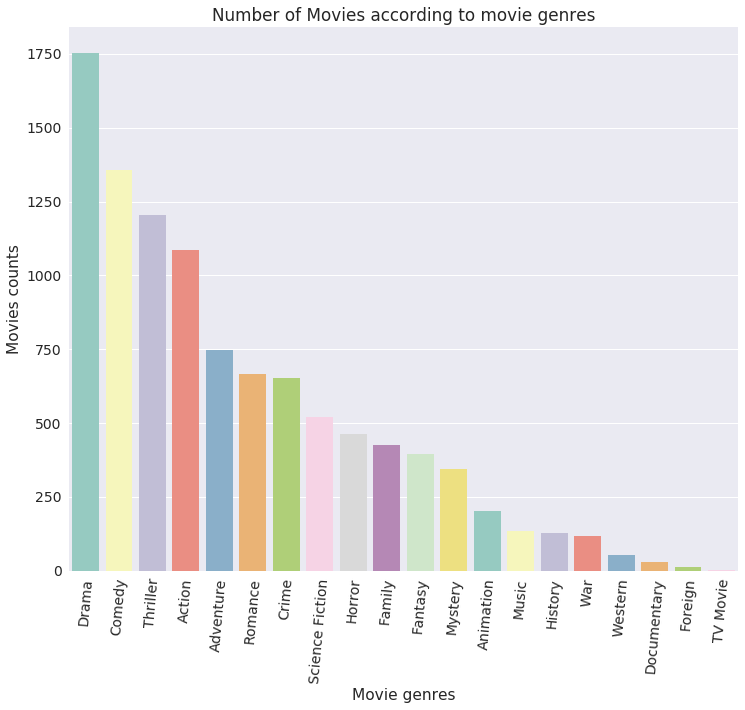

In [19]:
#Two visualize that
genre_count = gerne_count_per_year_df.apply(sum)
genre_count = genre_count.sort_values(ascending= False)

sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)
ax = sns.barplot(genre_count.index, genre_count, palette="Set3", linewidth = 0)


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    
ax.set(xlabel='Movie genres', ylabel='Movies counts', title = 'Number of Movies according to movie genres')
plt.show()

As we can see, Drama movies are the most frequent movie genre that other genres. In general The top 3 dominant movie genres all over these years (1960 - 2015) are [ Drama, Comedy and Thriller ].

### Research Question 4  (Top Movies based on features?)
It would be beneficial to find out which movies had the highest (budget), (revenue popularity) and (average votes). So let's find out which are these top 15 movies based on these attributes.

In [20]:
#Top 15 Movies based on these features

revenue_dict = {}

#Fetching different columns with 2 different ways of code
movies_and_revenue = data[["original_title", "revenue_adj"]]
movies_and_budget = data[['original_title','budget_adj']]
movies_and_popularity = data[['original_title','popularity']]
movies_and_votes= data[['original_title','vote_average']]

#### Question #4.1: Top Movies based on their revenue
The top 15 movies based on their adjusted revenue.

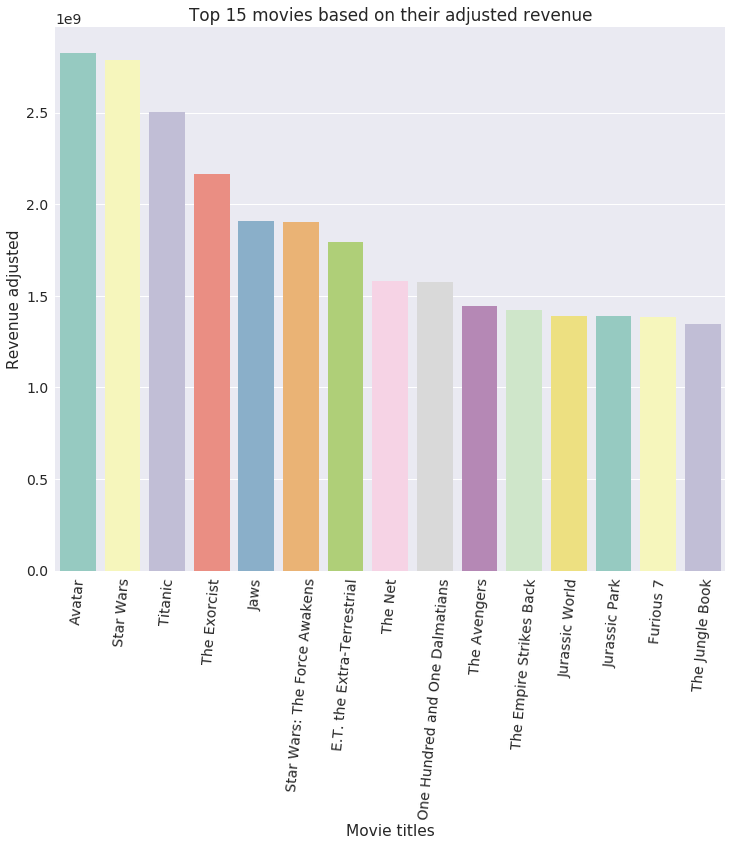

In [21]:
#To visualize that
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)

ax = sns.barplot(
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(15).original_title, 
    movies_and_revenue.sort_values(by = "revenue_adj", ascending=False).head(15).revenue_adj,
    linewidth = 0,
    palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)
    

ax.set(xlabel='Movie titles', ylabel='Revenue adjusted', title = 'Top 15 movies based on their adjusted revenue')
plt.show()

According to the table above, the top 5 movies from the given dataset based on their adjusted revenue are the followings; Avatar, Star Wars, Titanic, The Exorcist and Jaws.

According to the table above, the top 5 movies based on their adjusted budget are the followings; 
1. Avatar
2. Star Wars
3. Titanic
4. The Exorcist
5. Jaws.

#### Question #4.2: Top Movies based on their budget
The top 15 movies based on their adjusted budget.

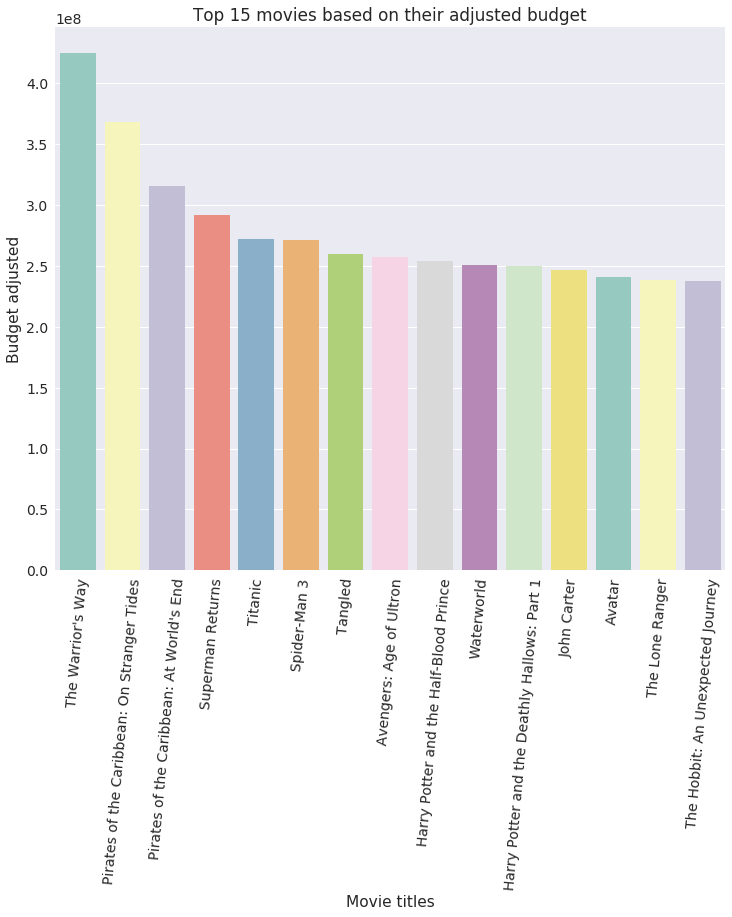

In [22]:
#To visualize that
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_budget.sort_values(by="budget_adj", ascending=False).head(15).original_title, 
    movies_and_budget.sort_values(by="budget_adj", ascending=False).head(15).budget_adj,
    linewidth = 0,
    palette="Set3")

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='Movie titles', ylabel='Budget adjusted', title = 'Top 15 movies based on their adjusted budget')
plt.show()

According to the table above, the top 5 movies based on their adjusted budget are the followings; 
1. The Warrior's Way
2. Pirates of the Caribbean: On Strange Tides
3. Pirates of the Caribbean
4. At World's Ends, Superman Returns
5. Titanic.

#### Question #4.3: Top Movies based on their popularity
The top 15 movies based on their adjusted popularity.

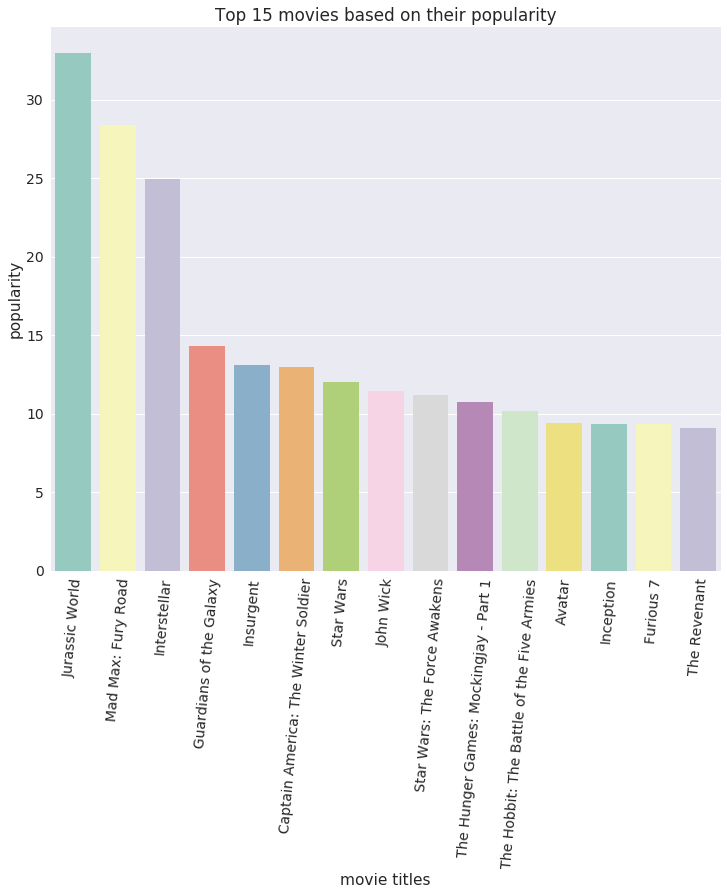

In [23]:
#To visualize that
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(15).original_title, 
    movies_and_popularity.sort_values(by="popularity", ascending=False).head(15).popularity,
    linewidth = 0,
    palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='popularity', title = 'Top 15 movies based on their popularity')
plt.show()

According to the table above, the top 5 movies based on their adjusted budget are the followings; 
1. Jurassic World
2. Mad Max: Fury Road
3. Interstellar
4. Guardians of the Galaxy
5. Insurgent.

#### Question #4.4: Top Movies based on their average vote
The top 15 movies based on their adjusted average vote.

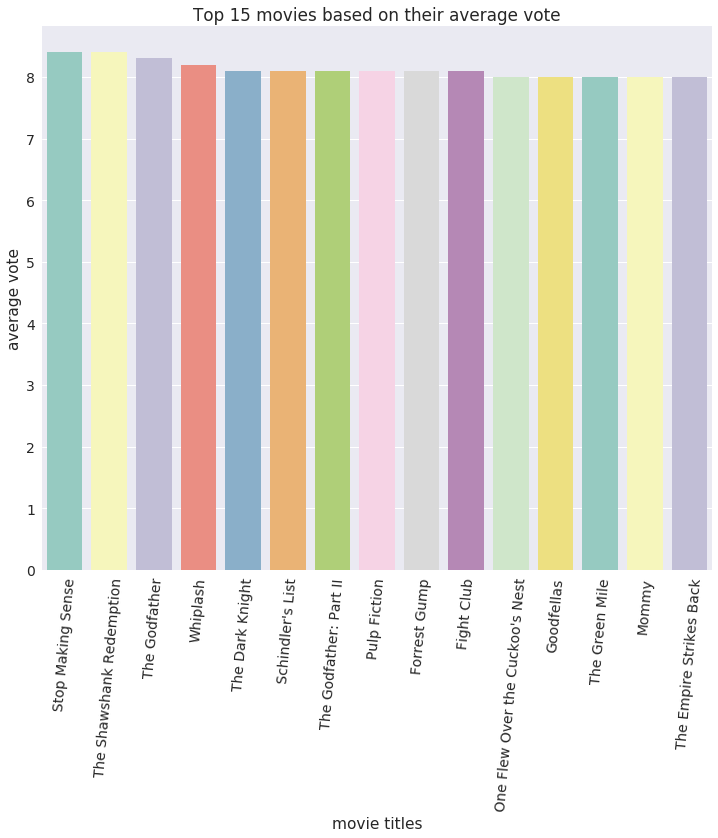

In [24]:
#To visualize that
sns.set(rc={'figure.figsize':(12,10)}, font_scale=1.4)


ax = sns.barplot(
    movies_and_votes.sort_values(by="vote_average", ascending=False).head(15).original_title, 
    movies_and_votes.sort_values(by="vote_average", ascending=False).head(15).vote_average,
    linewidth = 0,
    palette="Set3")


#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='movie titles', ylabel='average vote', title = 'Top 15 movies based on their average vote')
plt.show()

According to the table above, the top 5 movies based on their adjusted budget are the followings; 
1. The Shawshank Redemption
2. Stop Making Sense
3. The Godfather
4. Whiplash
5. Pulp Fiction.

### Research Question 5  (Average Votes Distribution?)
Let's move to somewhere else.
There is some curiosity about the movies' average votes. Lets see their distribution. 
Let's create a boxplot which illustrates their mean which is about 6. 
Also two plots were created; 
1. One with the distribution of the ratings from 1960 to 2015 
2. Another with the ratings distribution from by year.

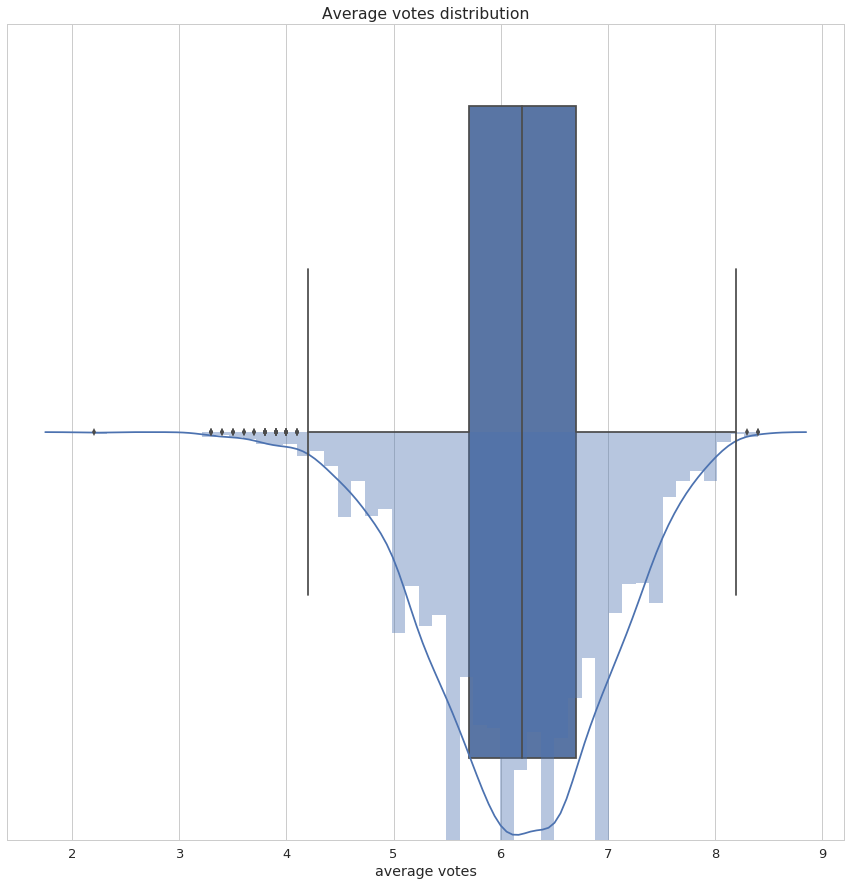

In [25]:
# Movie ratings' distribution all over the years
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)

temp_df = data[["vote_average"]]


sns.set_style("whitegrid")
ax = sns.distplot(temp_df.vote_average)

ax = sns.boxplot(x = temp_df.vote_average)

ax.set(xlabel='average votes', title = 'Average votes distribution')
plt.show()

#### Question 5.1: Ratings Distribution by Year
The previous question shows that the mean of the ratings all over these years (1960 - 2015) are almost 6. What about the ratings at a specific year. The following snippet code creates a plot showing the ratings distributions per year.

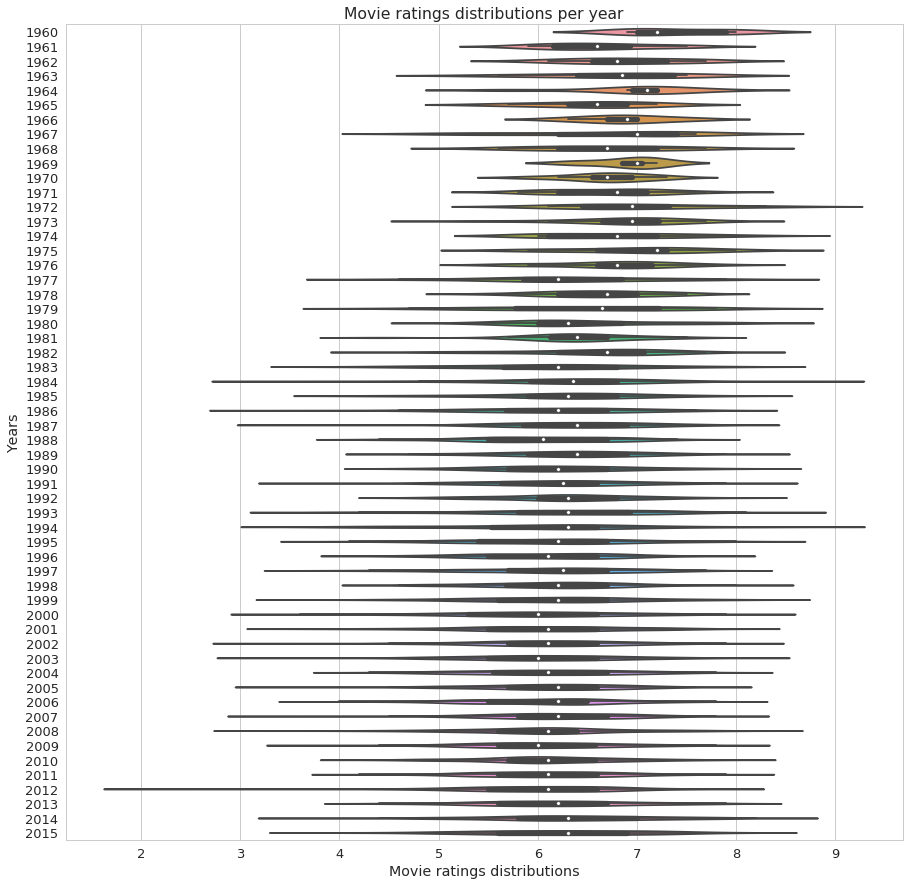

In [26]:
# Movie ratings' distributions per year
sns.set(rc={'figure.figsize':(15,15)}, font_scale=1.3)

temp_df = data[["release_year", "vote_average"]]

sns.set_style("whitegrid")
ax = sns.violinplot(x = temp_df.vote_average, y = temp_df.release_year, orient ="h")

ax.set(xlabel='Movie ratings distributions', ylabel='Years', title = 'Movie ratings distributions per year')
plt.show()

- The previous figure illustrates that all the years have mean ratings about 6 to 6.5. 
- However some exclusions such as the year 1974 has mean ratings around 7. It seems that during that time great movies with high impact on the crowd were produced.